# Práctica 7 - Recuperación de información: Approximate nearest neighbor algorithm based on navigable small worl graphs 
Alumno: Bryan Rodrigo Quiroz Palominos

### Instrucciones: Realizar implementación de "Approximate nearest neighbor algorithm based on navigable small world graphs" desarrollado por Yuri Malkov

## Librerias utilizadas

In [1]:
import numpy as np
import random
import math
import networkx as nx
import matplotlib.pyplot as plt

## Parámetros para ejecutar algoritmo

In [2]:
data_qty = 15 #Tamaño de base de datos
graph = [] 
f = 3 # number of nearest neighbors to connect
w = 3 #number of multi-search

## Generar datos de n cantidad y m dimensión

In [3]:
def generate_data(quantity):
    return 10*np.random.rand(quantity+1, 1)

## Método para calcular distancia euclidiana

In [4]:
def calculate_euclidean_distance(query, data):
    euclidean_distance = 0
    euclidean_distance += np.power((query - data), 2)
    euclidean_distance = np.sum(euclidean_distance)
    return euclidean_distance

## Método para obtener elemento más cercano

In [5]:
def get_closest_element(query, data):
    neighbors = []
    for i in range(len(data)):
        euclidean_distance = calculate_euclidean_distance(query, data[i])
        i_distance = math.sqrt(euclidean_distance)
        neighbors.append((data[i], i_distance))
    neighbors.sort(key=lambda neighbor: neighbor[1], reverse=False)
    return neighbors

## Método para obtener matriz de adyacencias de un vértice 

In [6]:
def find_adjacency_matrix(obj):
    for i in graph:
        if obj == i[0]:
            return i[1]

## KNN Search

In [7]:
def KNNSearch(query, m, k):
    TreeSet = {'tempRes': [], 'candidates': [], 'visitedSet': [], 'result': []}
    for i in range(m):
        entry_point = random.choice(graph)
        TreeSet['candidates'].append(entry_point[0])
        TreeSet['tempRes'] = []
        while True:
            closest_elements = get_closest_element(query, TreeSet['candidates'])
            c = closest_elements[0][0]
            TreeSet['candidates'].remove(c)
            result_len = len(TreeSet['result'])
            if result_len > 0:
                if calculate_euclidean_distance(query, c) > calculate_euclidean_distance(query, TreeSet['result'][result_len-1]):
                    break
            c_friends = find_adjacency_matrix(c)
            for e in c_friends:
                if e not in TreeSet['visitedSet']:
                    TreeSet['visitedSet'].append(e)
                    if e not in TreeSet['candidates']:
                        TreeSet['candidates'].append(e)
                    if e not in TreeSet['tempRes']:
                        TreeSet['tempRes'].append(e)
            break
        TreeSet['result'] += TreeSet['tempRes'].copy()
    return TreeSet['result'][0:k]

## Nearest Neighbor Insert

In [8]:
def nearest_neighbor_insert(new_obj, f, w):
    neighbords = KNNSearch(new_obj, w, f)
    new_obj_to_insert = (new_obj, [])
    for i in range(f):
        find_adjacency_matrix(neighbords[i]).append(new_obj)
        new_obj_to_insert[1].append(neighbords[i])
    graph.append(new_obj_to_insert)

# Ejecutar algoritmo

## Valores iniciales

In [9]:
data = generate_data(data_qty)
query = data[0]
data = data[1:]
print('--Valores iniciales--')
print('\nCantidad de datos generados:', len(data))
print('\nValor a consultar:',query)

--Valores iniciales--

Cantidad de datos generados: 15

Valor a consultar: [1.62492872]


## Insertar los f puntos a grafo y conectarlos

In [10]:
for i in range(f):
    graph.append((data[i], []))
    for j in range(f):
        if i != j:
            graph[i][1].append(data[j])

## Insertar los siguientes puntos en el grafo

In [11]:
for i in range(f, len(data)):
    nearest_neighbor_insert(data[i], f, w)

### Grafo

/home/bryan/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


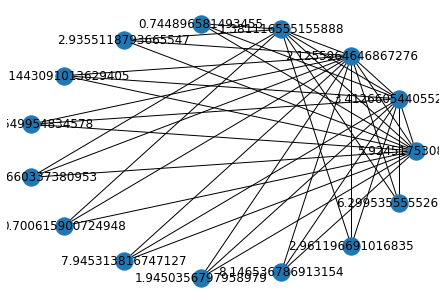

In [12]:
G = nx.Graph()
for i in range(len(graph)):
    for j in graph[i][1]:
        G.add_edge(str(graph[i][0][0]), str(j[0]), weight=str(graph[i][0][0]))

edge_labels = nx.get_edge_attributes(G, 'weight')
label = nx.nodes(G)
nx.draw_shell(G, with_labels=True, edge_labels=edge_labels)
plt.show()

## Calcular vecinos más cercanos

In [13]:
knn = KNNSearch(query, m=10, k=3)
print('\nConsulta:',query)
print('\nNeighbors:')

for i in range(len(knn)):
    print('Vecino #',i+1,':',knn[i])


Consulta: [1.62492872]

Neighbors:
Vecino # 1 : [3.41266054]
Vecino # 2 : [2.12559646]
Vecino # 3 : [1.38111656]


## Graficar vecinos más cercanos

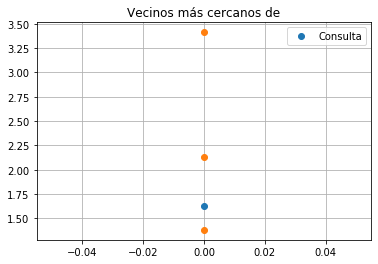

In [14]:
plt.title('Vecinos más cercanos de') 
plt.grid()
plt.plot(query, 'o', color='C0', label='Consulta') 

for i in knn:
    plt.plot(i, 'o', color='C1')
plt.legend()
plt.show()